In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
!pip install textblob 
from textblob import TextBlob
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Understanding the data a lil bit more

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Information Retrieval Project/cleaned_tmdb_data.csv')
data

,Unnamed: 0,Movie Name,Movie Id,Review Content,tmdb Rating,User Rating,Genre(s),Not A Movie?,Release Date,Production Company
0,0,Shadows in Paradise,3.0,"Released in 1986, Aki Kaurismaki's <i>Varjoja ...",7.184,7.0,"Drama,Comedy,Romance",False,1986-10-17,Villealfa Filmproductions
1,1,American Beauty,14.0,The film American Beauty to me is a film about...,8.030,10.0,Drama,False,1999-09-15,Jinks/Cohen Company
2,2,Citizen Kane,15.0,"""The Greatest Movie of All Time!"" That's the g...",8.023,9.0,"Mystery,Drama",False,1941-04-17,Mercury Productions
3,3,Dancer in the Dark,16.0,Dazzling Björk in this indictment against the ...,7.889,10.0,"Drama,Crime",False,2000-06-30,Lantia Cinema & Audiovisivi
4,4,The Fifth Element,18.0,This movie is one of the best movies of all ti...,7.524,9.5,"Adventure,Fantasy,Action,Thriller,Science Fiction",False,1997-05-02,Gaumont
...,...,...,...,...,...,...,...,...,...,...
9882,9882,Wagah,353415.0,"In his previous film, Haridas, GNR Kumaravelan...",4.400,3.0,"Action,Drama,Romance",False,2016-08-12,Vijay Bhargavi Films
9883,9883,Killing Hasselhoff,353440.0,"Not good, but better than I had prepared mysel...",4.700,4.0,Comedy,False,2017-08-29,Lotus Pictures
9884,9884,Killing Hasselhoff,353440.0,"Good watch, would watch again, and can recomme...",4.700,6.0,Comedy,False,2017-08-29,Lotus Pictures
9885,9885,The Magic Canvas,353478.0,The opening slide gives us an idea as to what ...,7.000,7.0,Animation,False,1948-12-30,Halas and Batchelor Cartoon Films


In [5]:
data.columns

Index(['Unnamed: 0', 'Movie Name', 'Movie Id', 'Review Content', 'tmdb Rating',
       'User Rating', 'Genre(s)', 'Not A Movie?', 'Release Date',
       'Production Company'],
      dtype='object')

In [6]:
data.describe()

,Unnamed: 0,Movie Id,tmdb Rating,User Rating
count,9887.00000,9887.000000,9887.000000,9887.000000
mean,4943.00000,115044.258926,6.287898,6.471629
std,2854.27539,118822.924637,1.031548,2.006446
min,0.00000,3.000000,0.000000,0.500000
25%,2471.50000,14607.000000,5.725500,5.000000
50%,4943.00000,43519.000000,6.371000,7.000000
75%,7414.50000,228265.000000,6.996000,8.000000
max,9886.00000,353486.000000,10.000000,10.000000


In [7]:
unique_movie_ids = data['Movie Id'].nunique()
print('Number of unique movie IDs:', unique_movie_ids)

Number of unique movie IDs: 8625


In [8]:
movies_count = data.groupby(['Movie Id', 'Movie Name']).size().reset_index(name='Count')
movies_count

,Movie Id,Movie Name,Count
0,3.0,Shadows in Paradise,1
1,14.0,American Beauty,1
2,15.0,Citizen Kane,1
3,16.0,Dancer in the Dark,1
4,18.0,The Fifth Element,1
...,...,...,...
8620,353081.0,Mission: Impossible - Fallout,7
8621,353415.0,Wagah,1
8622,353440.0,Killing Hasselhoff,2
8623,353478.0,The Magic Canvas,1


In [9]:
max_count = movies_count['Count'].max()
max_count_movies = movies_count[movies_count['Count'] == max_count][['Movie Id', 'Movie Name']]

print('Maximum count value:', max_count)
print('Movie ID(s) and Name(s) with maximum count value:\n', max_count_movies)

Maximum count value: 17
Movie ID(s) and Name(s) with maximum count value:
       Movie Id     Movie Name
7774  284054.0  Black Panther


In [10]:
movies_avg_rating = data.groupby('Movie Id').agg({'Movie Name': 'first', 'User Rating': 'mean', 'tmdb Rating': 'mean', 'Genre(s)': 'first'}).reset_index()
movies_avg_rating

,Movie Id,Movie Name,User Rating,tmdb Rating,Genre(s)
0,3.0,Shadows in Paradise,7.000000,7.184,"Drama,Comedy,Romance"
1,14.0,American Beauty,10.000000,8.030,Drama
2,15.0,Citizen Kane,9.000000,8.023,"Mystery,Drama"
3,16.0,Dancer in the Dark,10.000000,7.889,"Drama,Crime"
4,18.0,The Fifth Element,9.500000,7.524,"Adventure,Fantasy,Action,Thriller,Science Fiction"
...,...,...,...,...,...
8620,353081.0,Mission: Impossible - Fallout,7.857143,7.401,"Action,Adventure"
8621,353415.0,Wagah,3.000000,4.400,"Action,Drama,Romance"
8622,353440.0,Killing Hasselhoff,5.000000,4.700,Comedy
8623,353478.0,The Magic Canvas,7.000000,7.000,Animation


# Label using TextBlob

Preprocessing function

In [11]:
punctuations = '!"#%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
stopword = nltk.corpus.stopwords.words('english')

In [12]:
def clean_text(text):
    text_noreply = re.sub('Replying to', '', text)
    text_nolink = re.sub('(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', text_noreply)
    text_noname = re.sub('(?<!\w)@[\w+]{1,15}', '', text_nolink)
    text_punct = "".join([word.lower() for word in text_noname if word not in punctuations]) # remove puntuation
    text_punct = re.sub('[0-9]+', '', text_punct)
    text_tokenized = re.split('[^(A-Za-z0-9_$)]+', text_punct) # tokenization, remove non-words
    # text_nonstop = [word for word in text_tokenized if word not in stopword] # remove stopwords and stemming
    return " ".join(text_tokenized)

Load TextBlob

In [13]:
def analyze_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

Dataset preprocessing

In [14]:
data["clean_review_content"] = data["Review Content"].apply(clean_text)
data

,Unnamed: 0,Movie Name,Movie Id,Review Content,tmdb Rating,User Rating,Genre(s),Not A Movie?,Release Date,Production Company,clean_review_content
0,0,Shadows in Paradise,3.0,"Released in 1986, Aki Kaurismaki's <i>Varjoja ...",7.184,7.0,"Drama,Comedy,Romance",False,1986-10-17,Villealfa Filmproductions,released in aki kaurismakis ivarjoja paratiisi...
1,1,American Beauty,14.0,The film American Beauty to me is a film about...,8.030,10.0,Drama,False,1999-09-15,Jinks/Cohen Company,the film american beauty to me is a film about...
2,2,Citizen Kane,15.0,"""The Greatest Movie of All Time!"" That's the g...",8.023,9.0,"Mystery,Drama",False,1941-04-17,Mercury Productions,the greatest movie of all time thats the gener...
3,3,Dancer in the Dark,16.0,Dazzling Björk in this indictment against the ...,7.889,10.0,"Drama,Crime",False,2000-06-30,Lantia Cinema & Audiovisivi,dazzling bj rk in this indictment against the ...
4,4,The Fifth Element,18.0,This movie is one of the best movies of all ti...,7.524,9.5,"Adventure,Fantasy,Action,Thriller,Science Fiction",False,1997-05-02,Gaumont,this movie is one of the best movies of all ti...
...,...,...,...,...,...,...,...,...,...,...,...
9882,9882,Wagah,353415.0,"In his previous film, Haridas, GNR Kumaravelan...",4.400,3.0,"Action,Drama,Romance",False,2016-08-12,Vijay Bhargavi Films,in his previous film haridas gnr kumaravelan m...
9883,9883,Killing Hasselhoff,353440.0,"Not good, but better than I had prepared mysel...",4.700,4.0,Comedy,False,2017-08-29,Lotus Pictures,not good but better than i had prepared myself...
9884,9884,Killing Hasselhoff,353440.0,"Good watch, would watch again, and can recomme...",4.700,6.0,Comedy,False,2017-08-29,Lotus Pictures,good watch would watch again and can recommend...
9885,9885,The Magic Canvas,353478.0,The opening slide gives us an idea as to what ...,7.000,7.0,Animation,False,1948-12-30,Halas and Batchelor Cartoon Films,the opening slide gives us an idea as to what ...


In [15]:
# apply the function to the clean_review_contents column
data['sentiment'] = data['clean_review_content'].apply(analyze_sentiment)

# map the sentiment scores to positive, negative, or neutral labels
data['polarity'] = data['sentiment'].map(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

In [16]:
data

,Unnamed: 0,Movie Name,Movie Id,Review Content,tmdb Rating,User Rating,Genre(s),Not A Movie?,Release Date,Production Company,clean_review_content,sentiment,polarity
0,0,Shadows in Paradise,3.0,"Released in 1986, Aki Kaurismaki's <i>Varjoja ...",7.184,7.0,"Drama,Comedy,Romance",False,1986-10-17,Villealfa Filmproductions,released in aki kaurismakis ivarjoja paratiisi...,0.151511,positive
1,1,American Beauty,14.0,The film American Beauty to me is a film about...,8.030,10.0,Drama,False,1999-09-15,Jinks/Cohen Company,the film american beauty to me is a film about...,0.059632,positive
2,2,Citizen Kane,15.0,"""The Greatest Movie of All Time!"" That's the g...",8.023,9.0,"Mystery,Drama",False,1941-04-17,Mercury Productions,the greatest movie of all time thats the gener...,0.497235,positive
3,3,Dancer in the Dark,16.0,Dazzling Björk in this indictment against the ...,7.889,10.0,"Drama,Crime",False,2000-06-30,Lantia Cinema & Audiovisivi,dazzling bj rk in this indictment against the ...,0.190476,positive
4,4,The Fifth Element,18.0,This movie is one of the best movies of all ti...,7.524,9.5,"Adventure,Fantasy,Action,Thriller,Science Fiction",False,1997-05-02,Gaumont,this movie is one of the best movies of all ti...,0.571429,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9882,9882,Wagah,353415.0,"In his previous film, Haridas, GNR Kumaravelan...",4.400,3.0,"Action,Drama,Romance",False,2016-08-12,Vijay Bhargavi Films,in his previous film haridas gnr kumaravelan m...,0.011979,positive
9883,9883,Killing Hasselhoff,353440.0,"Not good, but better than I had prepared mysel...",4.700,4.0,Comedy,False,2017-08-29,Lotus Pictures,not good but better than i had prepared myself...,0.051042,positive
9884,9884,Killing Hasselhoff,353440.0,"Good watch, would watch again, and can recomme...",4.700,6.0,Comedy,False,2017-08-29,Lotus Pictures,good watch would watch again and can recommend...,0.201124,positive
9885,9885,The Magic Canvas,353478.0,The opening slide gives us an idea as to what ...,7.000,7.0,Animation,False,1948-12-30,Halas and Batchelor Cartoon Films,the opening slide gives us an idea as to what ...,0.117255,positive


In [17]:
data['polarity'].value_counts()

positive    8632
negative    1194
neutral       61
Name: polarity, dtype: int64

In [18]:
data.loc[data['polarity'] == 'negative']

,Unnamed: 0,Movie Name,Movie Id,Review Content,tmdb Rating,User Rating,Genre(s),Not A Movie?,Release Date,Production Company,clean_review_content,sentiment,polarity
15,15,Talk to Her,64.0,Now this is…really something different like th...,7.600,8.0,"Drama,Romance",False,2002-03-15,Vía Digital,now this is really something different like th...,-0.046667,negative
20,20,American History X,73.0,"Despite having a somewhat weak cast, this is a...",8.358,9.0,Drama,False,1998-07-01,New Line Cinema,despite having a somewhat weak cast this is an...,-0.180455,negative
27,27,Open Water,83.0,If you like Extreme EXTREME Close Ups filmed o...,5.515,3.0,"Drama,Thriller,Horror",False,2003-10-26,Plunge Pictures LLC,if you like extreme extreme close ups filmed o...,-0.062500,negative
33,33,Tron,97.0,"An acquired taste. For me, someone who has no ...",6.684,4.0,"Science Fiction,Action,Adventure",False,1982-07-09,Lisberger/Kushner Productions,an acquired taste for me someone who has no kn...,-0.002890,negative
36,36,Léon: The Professional,101.0,"HOW TO MAKE A FEMALE ASSASSIN. TRAUMA, TRAININ...",8.320,10.0,"Crime,Drama,Action",False,1994-09-14,Gaumont,how to make a female assassin trauma training ...,-0.050000,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9851,9851,Jurassic World: Fallen Kingdom,351286.0,MORE REVIEWS @ https://www.msbreviews.com/ Ju...,6.551,3.0,"Action,Adventure,Science Fiction,Thriller",False,2018-06-22,Amblin Entertainment,more reviews jurassic world fallenkingdom stil...,-0.128571,negative
9852,9852,Jurassic World: Fallen Kingdom,351286.0,"Well, this is the fourth Jurassic Park movie I...",6.551,6.0,"Action,Adventure,Science Fiction,Thriller",False,2018-06-22,Amblin Entertainment,well this is the fourth jurassic park movie i ...,-0.016281,negative
9854,9854,Neruda,351454.0,**Chile's own catch me if you can!** It was C...,6.300,6.0,Drama,False,2016-08-11,Participant,chiles own catch me if you can it was chiles o...,-0.023665,negative
9861,9861,The Clan,352161.0,**A family with the dark secret.** It's right...,6.771,6.0,"Drama,History,Crime",False,2015-08-13,El Deseo,a family with the dark secret its right to say...,-0.010193,negative


## Word Cloud Generation

In [19]:
data.columns

Index(['Unnamed: 0', 'Movie Name', 'Movie Id', 'Review Content', 'tmdb Rating',
       'User Rating', 'Genre(s)', 'Not A Movie?', 'Release Date',
       'Production Company', 'clean_review_content', 'sentiment', 'polarity'],
      dtype='object')

## Import Kaggle Data

In [20]:
kaggle = pd.read_csv('/content/drive/MyDrive/Information Retrieval Project/cleanedData.csv')
kaggle = kaggle.dropna()
kaggle

,text,sentiment
0,one reviewer mentioned watching oz episode hoo...,0.0
1,wonderful little production filming technique ...,0.0
2,thought wonderful way spend time hot summer we...,0.0
3,basically family little boy jake think zombie ...,1.0
4,petter mattei love time money visually stunnin...,0.0
...,...,...
74995,richard farnsworth one favorite actor usually ...,1.0
74996,comment may bit spoiler worth stop care enough...,1.0
74997,saucy misadventure four au pair arrive london ...,1.0
74998,oh italian assuming movie aristocrat weird fet...,1.0


In [21]:
kaggle.columns

Index(['text', 'sentiment'], dtype='object')

In [22]:
kaggle_pos = kaggle[kaggle["sentiment"] == 0]
kaggle_pos = kaggle_pos.iloc[0:1000]
kaggle_pos

,text,sentiment
0,one reviewer mentioned watching oz episode hoo...,0.0
1,wonderful little production filming technique ...,0.0
2,thought wonderful way spend time hot summer we...,0.0
4,petter mattei love time money visually stunnin...,0.0
5,probably time favorite movie story selflessnes...,0.0
...,...,...
1974,sharp well made documentary focusing mardi gra...,0.0
1977,looking bottom movie according imdb user seein...,0.0
1982,story movie fairly implausible b grade stuff s...,0.0
1983,saw expectation absolutely loved bend like bec...,0.0


In [23]:
kaggle_neg = kaggle[kaggle["sentiment"] == 1]
kaggle_neg = kaggle_neg.iloc[0:1000]
kaggle_neg

,text,sentiment
3,basically family little boy jake think zombie ...,1.0
7,show amazing fresh innovative idea first aired...,1.0
8,encouraged positive comment film looking forwa...,1.0
10,phil alien one quirky film humour based around...,1.0
11,saw movie came recall scariest scene big bird ...,1.0
...,...,...
2000,stranded space mst k version not good tv movie...,1.0
2005,happened catch supposed horror flick late one ...,1.0
2007,waste h nasty little film one avoid like cheap...,1.0
2010,warning could spoil movie watch see agree thin...,1.0


In [24]:
kaggle_small = pd.concat([kaggle_neg, kaggle_pos])
kaggle_small

,text,sentiment
3,basically family little boy jake think zombie ...,1.0
7,show amazing fresh innovative idea first aired...,1.0
8,encouraged positive comment film looking forwa...,1.0
10,phil alien one quirky film humour based around...,1.0
11,saw movie came recall scariest scene big bird ...,1.0
...,...,...
1974,sharp well made documentary focusing mardi gra...,0.0
1977,looking bottom movie according imdb user seein...,0.0
1982,story movie fairly implausible b grade stuff s...,0.0
1983,saw expectation absolutely loved bend like bec...,0.0


In [30]:
eval_dataset = pd.read_csv('/content/drive/MyDrive/Information Retrieval Project/evalSet.csv').dropna()
sub_dataset = pd.read_csv('/content/drive/MyDrive/Information Retrieval Project/subset_labelled.csv').dropna()

# Baseline: SVM Classifier

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import timeit
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(kaggle_small["text"], kaggle_small["sentiment"], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train SVM classifier
svm = SVC(kernel="linear", C=1.0, random_state=42, verbose = True)
svm.fit(X_train, y_train)
start_time=timeit.default_timer() 
# Test SVM classifier
y_pred = svm.predict(X_test)
end_time=timeit.default_timer() 
# Print classification report
print(classification_report(y_test, y_pred))
time_taken_per_instance=(end_time-start_time)/400
1/time_taken_per_instance

[LibSVM]              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       201
         1.0       0.79      0.85      0.82       199

    accuracy                           0.81       400
   macro avg       0.82      0.82      0.81       400
weighted avg       0.82      0.81      0.81       400



904.3628753143196

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Vectorize the text data using the same CountVectorizer instance that was fit on kaggle_small
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(kaggle_small["text"])
X_test = vectorizer.transform(eval_dataset["text"])

y_train = kaggle_small["sentiment"]
y_test = eval_dataset["Sentiment"]

# Train SVM classifier
svm = SVC(kernel="linear", C=1.0, random_state=42, verbose = True)
svm.fit(X_train, y_train)

# Test SVM classifier on eval_dataset
y_pred = svm.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


[LibSVM]              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       763
         1.0       0.54      0.50      0.52       236

    accuracy                           0.78       999
   macro avg       0.69      0.68      0.69       999
weighted avg       0.78      0.78      0.78       999



In [38]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Vectorize the text data using the same CountVectorizer instance that was fit on kaggle_small
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(kaggle_small["text"])
X_test = vectorizer.transform(sub_dataset["text"])

y_train = kaggle_small["sentiment"]
y_test = sub_dataset["Polarity"]

# Train SVM classifier
svm = SVC(kernel="linear", C=1.0, random_state=42, verbose = True)
svm.fit(X_train, y_train)

# Test SVM classifier on sub_dataset
y_pred = svm.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

[LibSVM]              precision    recall  f1-score   support

         0.0       0.93      0.72      0.81       843
         1.0       0.29      0.66      0.41       146

    accuracy                           0.72       989
   macro avg       0.61      0.69      0.61       989
weighted avg       0.83      0.72      0.75       989



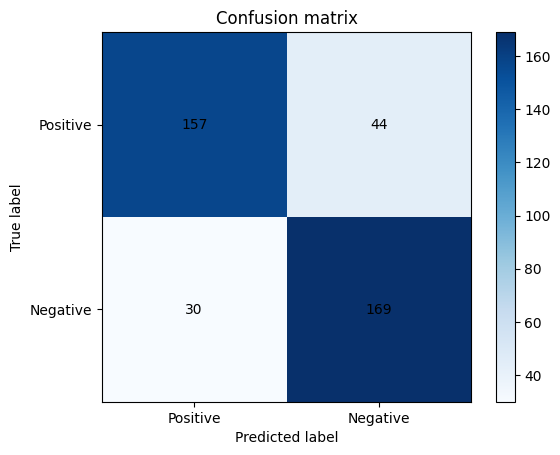

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix with counts
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ["Positive", "Negative"])
plt.yticks([0, 1], ["Positive", "Negative"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix")
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]), ha="center", va="center", color="black")
plt.show()

# Baseline: Random Forest Classifier

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(kaggle_small["text"], kaggle_small["sentiment"], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
start_time=timeit.default_timer() 
# Test random forest classifier
y_pred = rf.predict(X_test)
end_time=timeit.default_timer() 
# Print classification report
print(classification_report(y_test, y_pred))
time_taken_per_instance=(end_time-start_time)/400
1/time_taken_per_instance

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       201
         1.0       0.83      0.81      0.82       199

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



10605.985158941683

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Vectorize the text data using the same CountVectorizer instance that was fit on kaggle_small
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(kaggle_small["text"])
X_test = vectorizer.transform(eval_dataset["text"])

y_train = kaggle_small["sentiment"]
y_test = eval_dataset["Sentiment"]

# Train random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Test random forest classifier
y_pred = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       763
         1.0       0.60      0.47      0.53       236

    accuracy                           0.80       999
   macro avg       0.72      0.69      0.70       999
weighted avg       0.79      0.80      0.79       999



In [39]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Vectorize the text data using the same CountVectorizer instance that was fit on kaggle_small
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(kaggle_small["text"])
X_test = vectorizer.transform(sub_dataset["text"])

y_train = kaggle_small["sentiment"]
y_test = sub_dataset["Polarity"]

# Train random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Test random forest classifier
y_pred = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84       843
         1.0       0.32      0.62      0.42       146

    accuracy                           0.75       989
   macro avg       0.62      0.69      0.63       989
weighted avg       0.83      0.75      0.78       989



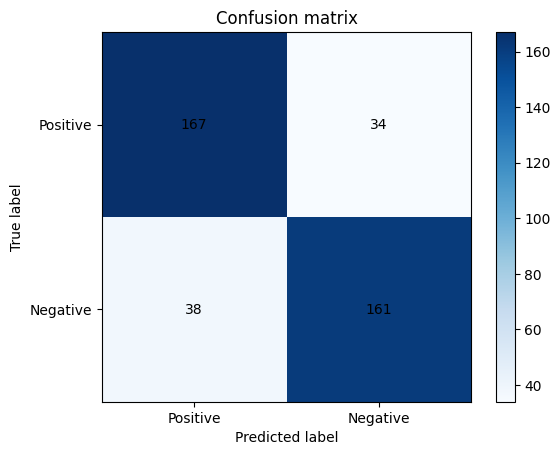

In [ ]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ["Positive", "Negative"])
plt.yticks([0, 1], ["Positive", "Negative"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix")
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]), ha="center", va="center", color="black")
plt.show()

# Baseline: Naive Bayes Classifier

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import timeit

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(kaggle_small["text"], kaggle_small["sentiment"], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)
start_time=timeit.default_timer() 
# Test Naive Bayes classifier
y_pred = nb.predict(X_test)
 
end_time=timeit.default_timer() 
# Print classification report
print(classification_report(y_test, y_pred))

time_taken_per_instance=(end_time-start_time)/400
1/time_taken_per_instance

              precision    recall  f1-score   support

         0.0       0.85      0.73      0.78       201
         1.0       0.76      0.87      0.81       199

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



503998.5989094844

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Vectorize the text data using the same CountVectorizer instance that was fit on kaggle_small
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(kaggle_small["text"])
X_test = vectorizer.transform(eval_dataset["text"])

y_train = kaggle_small["sentiment"]
y_test = eval_dataset["Sentiment"]

# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Test Naive Bayes classifier
y_pred = nb.predict(X_test)
 
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       763
         1.0       0.51      0.50      0.51       236

    accuracy                           0.77       999
   macro avg       0.68      0.68      0.68       999
weighted avg       0.77      0.77      0.77       999



In [40]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Vectorize the text data using the same CountVectorizer instance that was fit on kaggle_small
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(kaggle_small["text"])
X_test = vectorizer.transform(sub_dataset["text"])

y_train = kaggle_small["sentiment"]
y_test = sub_dataset["Polarity"]

# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Test Naive Bayes classifier
y_pred = nb.predict(X_test)
 
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.71      0.81       843
         1.0       0.30      0.71      0.42       146

    accuracy                           0.71       989
   macro avg       0.62      0.71      0.62       989
weighted avg       0.84      0.71      0.75       989



In [ ]:
X_test

<400x19910 sparse matrix of type '<class 'numpy.int64'>'
	with 34963 stored elements in Compressed Sparse Row format>

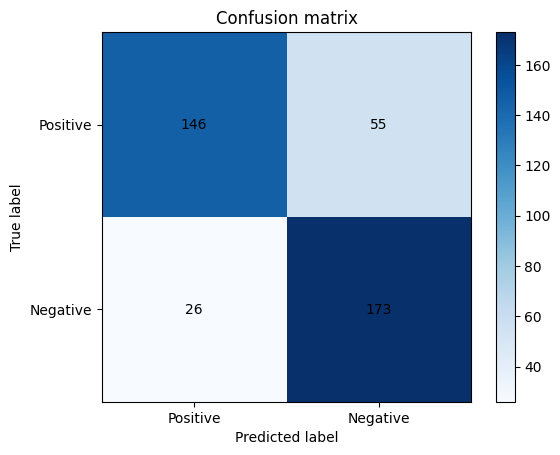

In [ ]:

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ["Positive", "Negative"])
plt.yticks([0, 1], ["Positive", "Negative"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix")
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]), ha="center", va="center", color="black")
plt.show()


## ChatGPT Classifier

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer, GPT2LMHeadModel, AdamW, get_linear_schedule_with_warmup

df = kaggle_small  # This line is missing. It should be replaced with your desired dataframe.
df = df.sample(frac=1).reset_index(drop=True)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

train_encodings = tokenizer(list(train_df['text']), truncation=True, padding=True)
test_encodings = tokenizer(list(test_df['text']), truncation=True, padding=True)

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]).to(device) for key, val in self.encodings.items()}, torch.tensor(self.labels[idx]).to(device)

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, train_df['sentiment'])
test_dataset = SentimentDataset(test_encodings, test_df['sentiment'])

model = GPT2LMHeadModel.from_pretrained('gpt2')
model.resize_token_embeddings(len(tokenizer))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True)

optimizer = AdamW(model.parameters(), lr=5e-5)
num_training_steps = len(train_loader) * 10
lr_scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

def train(model, data_loader, optimizer, lr_scheduler):
    model.train()
    for batch_idx, batch in enumerate(data_loader):
        optimizer.zero_grad()
        inputs, targets = batch
        if torch.max(inputs['input_ids']) >= model.config.vocab_size:
            print("Skipped batch - input index out of range of embedding matrix")
            continue
        outputs = model(inputs['input_ids'], labels=inputs['input_ids'])
        loss = outputs.loss
        loss.backward()
        optimizer.step()
    lr_scheduler.step()

def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in data_loader:
            if torch.max(inputs['input_ids']) >= model.config.vocab_size:
                print("Skipped batch - input index out of range of embedding matrix")
                continue
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs['input_ids'])
            _, predicted = torch.max(outputs.logits, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    return correct / total

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(10):
    train(model, train_loader, optimizer, lr_scheduler)
    accuracy = evaluate(model, test_loader)
    print(f"Epoch {epoch}: accuracy = {accuracy:.2%}")

